In [1]:
import pandas as pd
import numpy as np
import pickle
import sys
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.stem.porter import *
import string
import re
import gensim.models.word2vec as w2v
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import seaborn
import os
import pickle

In [3]:
model = w2v.Word2Vec.load(os.path.join("trained", "vec.w2v"))

In [4]:
filename = 'kmeans_model.sav'
kmeans = pickle.load(open(filename, 'rb'))

In [5]:
from sklearn.decomposition import PCA

l = kmeans.fit_predict(model.wv.syn0)
pca = PCA(n_components=2).fit(model.wv.syn0)
datapoint = pca.transform(model.wv.syn0)


/home/abhishek/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/home/abhishek/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  after removing the cwd from sys.path.
/home/abhishek/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """


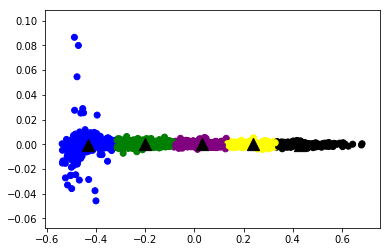

In [7]:
import matplotlib.pyplot as plt
plt.figure
labels=kmeans.labels_.tolist()
label1 = ["#FFFF00", "#008000", "#0000FF", "#800080","#000000"]
color = [label1[i] for i in labels]
plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color)

centroids = kmeans.cluster_centers_
centroidpoint = pca.transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
plt.show()

In [9]:
all_word_vectors_matrix = model.wv.syn0

/home/abhishek/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """Entry point for launching an IPython kernel.


In [10]:
import sklearn.manifold
#my video - how to visualize a dataset easily
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)

In [11]:
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

In [12]:
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[model.wv.vocab[word].index])
            for word in model.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [13]:
points.head(10)

,word,x,y
0,paul,-34.441998,13.989655
1,jone,41.888832,-6.751395
2,trillion,28.121399,-27.331327
3,privat,-30.199476,-32.480423
4,sector,33.632412,-22.828993
5,lead,-22.907084,-32.444187
6,social,8.732432,-37.746468
7,chang,-25.090347,-30.557173
8,ceo,-20.940928,-35.615189
9,take,-28.335077,-34.165241


In [14]:
import seaborn as sns
sns.set_context("poster")

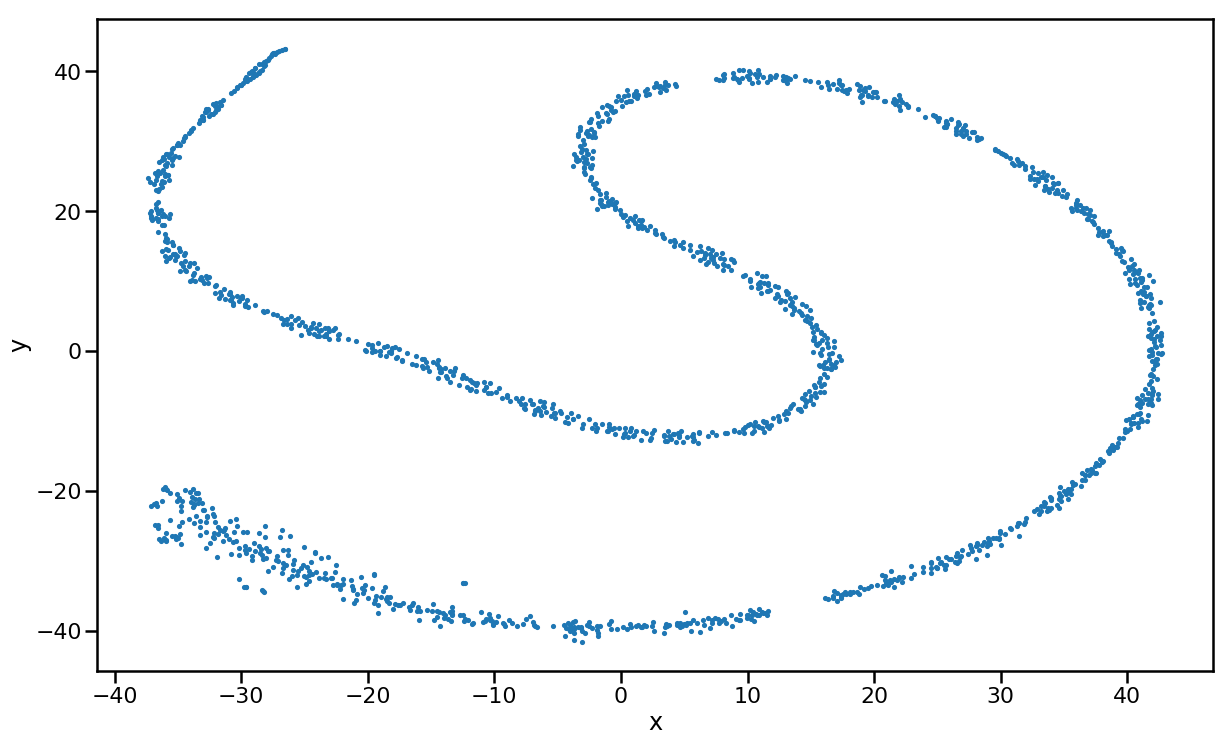

In [15]:
points.plot.scatter("x", "y", s=10, figsize=(20, 12))